# Лабораторна робота №3

Виконав студент 3 курсу
групи КА-02
Шинкарьов О.О.

Перевірила Недашківська Н.І.

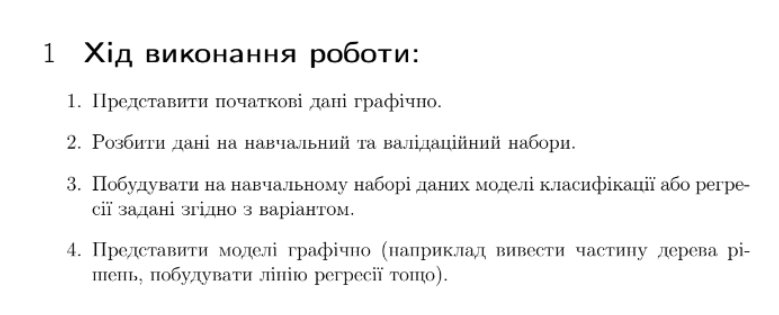

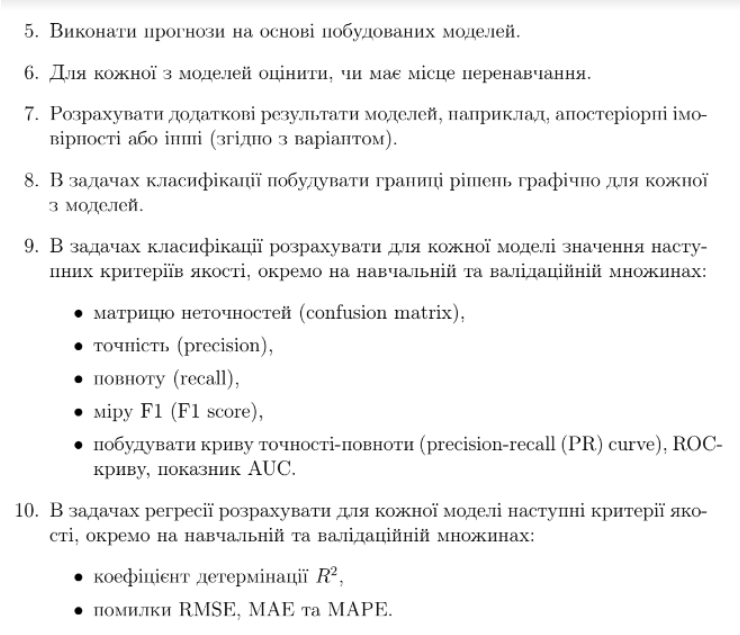

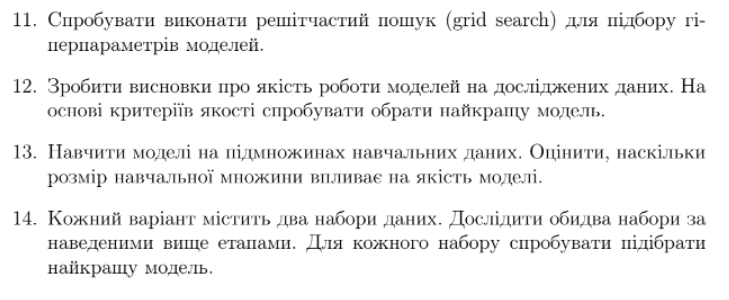

In [22]:
#імпорт необхідних бібліотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%precision 2
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

### 1 датасет

In [23]:
#завантаження датасету
data = pd.read_csv(r'C:\Users\shink\Downloads\dataset_Malicious_and_Benign_Websites.csv')

In [24]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [25]:
#завантаження обробленого датасету (обробка була здійснена в попередній лабораторній роботі)
import pickle
with open('data.csv', 'rb') as f:
    data_new = pickle.load(f)

In [26]:
data_new.head()

,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,lifetime,since_upd,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,iso,nginx,263,NONE,None,754,522,7,0,2,700,9,10,1153,832,9,2,1
1,16,6,utf,Apache,15087,NONE,None,6137,522,17,7,4,1230,17,19,1265,1230,17,0,0
2,16,6,us-ascii,microsoft,324,NONE,None,6137,522,0,0,0,0,0,0,0,0,0,0,0
3,17,6,iso,nginx,162,US,other,7420,1455,31,22,3,3812,39,37,18784,4380,39,8,0
4,17,6,utf,None,124140,US,other,7638,29,57,2,5,4278,61,62,129889,4586,61,4,0


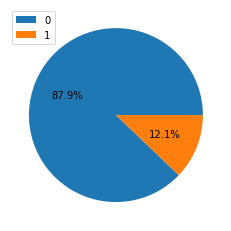

In [27]:
#зображення співвідношення об'єктів типів 0 і 1 на круговій діаграмі

plt.pie(data_new.type.value_counts(), autopct='%.1f%%')
plt.legend(loc = 'upper left', labels = [0, 1])
plt.show()

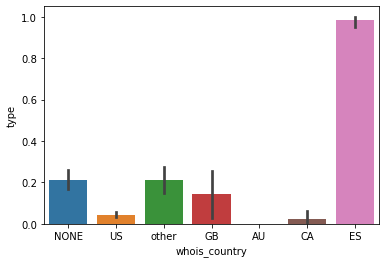

In [28]:
#зображення середнього значення type в залежності від країни у вигляді гістограми

plt.figure(figsize = (6,4))
sns.barplot(data = data_new , x = 'whois_country' , y = "type")
plt.show()

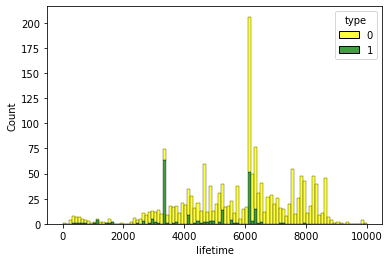

In [29]:
#розподіл об'єктів типів 0 і 1 на числовый прямій зі значеннями lifetime

plt.figure(figsize = (6,4))
sns.histplot(data = data_new, x = 'lifetime' , hue = "type",binwidth=100,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" )
plt.show()

In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   url_length                 1779 non-null   int64 
 1   number_special_characters  1779 non-null   int64 
 2   charset                    1779 non-null   object
 3   server                     1779 non-null   object
 4   content_length             1779 non-null   int64 
 5   whois_country              1779 non-null   object
 6   whois_statepro             1779 non-null   object
 7   lifetime                   1779 non-null   int64 
 8   since_upd                  1779 non-null   int64 
 9   tcp_conversation_exchange  1779 non-null   int64 
 10  dist_remote_tcp_port       1779 non-null   int64 
 11  remote_ips                 1779 non-null   int64 
 12  app_bytes                  1779 non-null   int64 
 13  source_app_packets         1779 non-null   int64 
 14  remote_a

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#присвоєння кодів категоріальним типам даних

le = LabelEncoder()
data_new['charset'] = le.fit_transform(data_new['charset'])
data_new['server'] = le.fit_transform(data_new['server'])
data_new['whois_country'] = le.fit_transform(data_new['whois_country'])
data_new['whois_statepro'] = le.fit_transform(data_new['whois_statepro'])

In [33]:
data_new.head()

,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,lifetime,since_upd,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,1,3,263,4,5,754,522,7,0,2,700,9,10,1153,832,9,2,1
1,16,6,3,0,15087,4,5,6137,522,17,7,4,1230,17,19,1265,1230,17,0,0
2,16,6,2,2,324,4,5,6137,522,0,0,0,0,0,0,0,0,0,0,0
3,17,6,1,3,162,5,8,7420,1455,31,22,3,3812,39,37,18784,4380,39,8,0
4,17,6,3,1,124140,5,8,7638,29,57,2,5,4278,61,62,129889,4586,61,4,0


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
#нормалізація фічей

sc = StandardScaler()
data_new[['url_length', 'number_special_characters', 'charset', 'server', 'content_length', 'whois_country',
          'whois_statepro', 'lifetime', 'since_upd', 'tcp_conversation_exchange', 'dist_remote_tcp_port',
          'remote_ips', 'app_bytes', 'source_app_packets', 'remote_app_packets','source_app_bytes', 'remote_app_bytes',
          'app_packets', 'dns_query_times']] = sc.fit_transform(data_new[['url_length', 'number_special_characters',
          'charset', 'server', 'content_length', 'whois_country', 'whois_statepro', 'lifetime', 'since_upd', 
          'tcp_conversation_exchange', 'dist_remote_tcp_port', 'remote_ips', 'app_bytes', 'source_app_packets', 
          'remote_app_packets','source_app_bytes', 'remote_app_bytes',
          'app_packets', 'dns_query_times']])

In [36]:
data_new.head()

,url_length,number_special_characters,charset,server,content_length,whois_country,whois_statepro,lifetime,since_upd,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,-1.486108,-0.903164,-1.373925,0.765706,-0.255053,-0.378694,-0.004447,-2.670737,-0.206481,-0.228793,-0.251072,-0.313100,-0.040755,-0.229369,-0.188806,-0.211178,-0.041492,-0.229369,-0.090349,1
1,-1.486108,-1.122933,0.789095,-1.138569,0.288119,-0.378694,-0.004447,0.203640,-0.206481,0.018052,0.069835,0.277260,-0.031302,-0.037234,0.005123,-0.209575,-0.034393,-0.037234,-0.772859,0
2,-1.486108,-1.122933,-0.292415,0.130948,-0.252818,-0.378694,-0.004447,0.203640,-0.206481,-0.401584,-0.251072,-0.903461,-0.053240,-0.445521,-0.404284,-0.227678,-0.056330,-0.445521,-0.772859,0
3,-1.449801,-1.122933,-1.373925,0.765706,-0.258754,0.405587,1.125832,0.888728,2.147949,0.363635,0.757494,-0.017920,0.014751,0.491138,0.392983,0.041127,0.021787,0.491138,1.957180,0
4,-1.449801,-1.122933,0.789095,-0.503810,4.283969,0.405587,1.125832,1.005134,-1.450568,1.005431,-0.159384,0.572441,0.023063,1.019510,0.931677,1.631076,0.025461,1.019510,0.592161,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#розбиття набору на тестовий та тренувальний

X_dataset = data_new.drop(['type'], axis = 1)
y_dataset = data_new.type
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = train_test_split(X_dataset,
                                                                                    y_dataset,
                                                                                    test_size = 0.33,
                                                                                    random_state = 42,
                                                                                    stratify = y_dataset)

In [39]:
#функції для обчислення метрик, побудовиди confusion_matrix і roc_cur

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score

def metrics(X, y, model):
    print('precision_score : ', precision_score(y, model.predict(X)))
    print('recall_score    : ', recall_score(y, model.predict(X)))
    print('f1_score        : ', f1_score(y, model.predict(X)))
    
def conf_matrix(X, y, model):
    y_pred = model.predict(X)
    sns.heatmap(confusion_matrix(y, y_pred)/np.sum(confusion_matrix(y, y_pred)),
            annot = True, fmt='.2%', cmap='Reds');
    
def roc_cur(X, y, model):
    y_predicted_prob = model.predict_proba(X)
    fpr, tpr, thresholds = roc_curve(y, y_predicted_prob[:,1])
    roc_auc= auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
#cтворення одношарової нейронної мережі

mlp_cl = MLPClassifier(hidden_layer_sizes = (), random_state=42)
mlp_cl.fit(X_train_dataset, y_train_dataset)

MLPClassifier(hidden_layer_sizes=(), random_state=42)

In [42]:
#точність алгоритму класифікації на тестових даних
accuracy_score(y_test_dataset,mlp_cl.predict(X_test_dataset))

0.9098639455782312

Тренувальні дані:
precision_score :  0.6065573770491803
recall_score    :  0.25517241379310346
f1_score        :  0.35922330097087374
-------------------------------------------------
Тестові дані:
precision_score :  0.6875
recall_score    :  0.4647887323943662
f1_score        :  0.5546218487394957


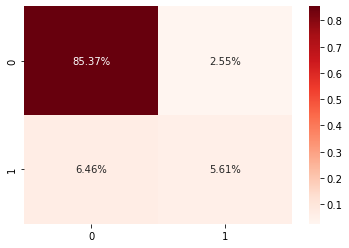

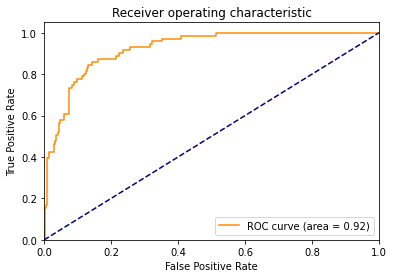

In [43]:
#метрики одношарової нейронної мережі
print('Тренувальні дані:')
metrics(X_train_dataset, y_train_dataset, mlp_cl)
print('-------------------------------------------------')
print('Тестові дані:')
metrics(X_test_dataset, y_test_dataset, mlp_cl)
conf_matrix(X_test_dataset, y_test_dataset, mlp_cl)
roc_cur(X_test_dataset, y_test_dataset, mlp_cl)

Бачимо, що одношарової нейронної мережі недостатньо

In [44]:
#створення двошарової нейронної мережі
mlp_cl_2 = MLPClassifier(random_state=42)
mlp_cl_2.fit(X_train_dataset, y_train_dataset)

MLPClassifier(random_state=42)

In [45]:
#точність алгоритму класифікації на тестових даних
accuracy_score(y_test_dataset,mlp_cl_2.predict(X_test_dataset))

0.9608843537414966

Тренувальні дані:
precision_score :  0.9307692307692308
recall_score    :  0.8344827586206897
f1_score        :  0.8800000000000001
-----------------------------------------------
Тестові дані:
precision_score :  0.8428571428571429
recall_score    :  0.8309859154929577
f1_score        :  0.8368794326241136


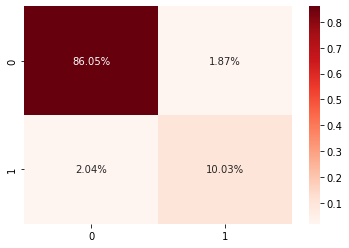

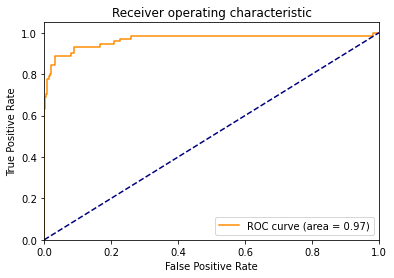

In [46]:
#метрики двошарової нейронної мережі
print('Тренувальні дані:')
metrics(X_train_dataset, y_train_dataset, mlp_cl_2)
print('-----------------------------------------------')
print('Тестові дані:')
metrics(X_test_dataset, y_test_dataset, mlp_cl_2)
conf_matrix(X_test_dataset, y_test_dataset, mlp_cl_2)
roc_cur(X_test_dataset, y_test_dataset, mlp_cl_2)

Бачимо, що двошарової нейронної мережі недостатньо

In [47]:
#побудова трьошарової нейронної мережі
mlp_cl_3 = MLPClassifier(hidden_layer_sizes = (100, 100, ), random_state=42)
mlp_cl_3.fit(X_train_dataset, y_train_dataset)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=42)

In [48]:
#точність алгоритму класифікації на тестових даних
accuracy_score(y_test_dataset,mlp_cl_3.predict(X_test_dataset))

0.9710884353741497

Тренувальні дані:
precision_score :  1.0
recall_score    :  1.0
f1_score        :  1.0
------------------------------------------------
Тестові дані:
precision_score :  0.9090909090909091
recall_score    :  0.8450704225352113
f1_score        :  0.8759124087591241


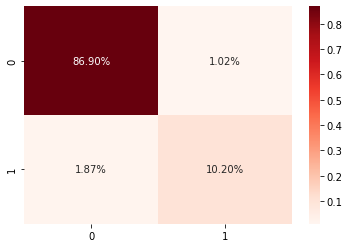

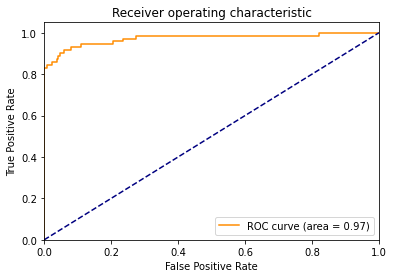

In [49]:
#метрики трьошарової нейронної мережі
print('Тренувальні дані:')
metrics(X_train_dataset, y_train_dataset, mlp_cl_3)
print('------------------------------------------------')
print('Тестові дані:')
metrics(X_test_dataset, y_test_dataset, mlp_cl_3)
conf_matrix(X_test_dataset, y_test_dataset, mlp_cl_3)
roc_cur(X_test_dataset, y_test_dataset, mlp_cl_3)

Бачимо, що трьошарова модель є достатньою

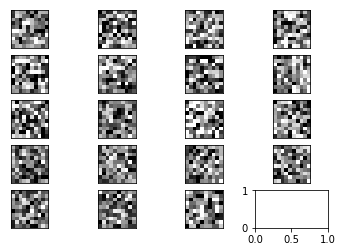

In [50]:
#візуалізація моделі
#побудуємо перші ваги моделі у вигляді теплової мапи
fig, axes = plt.subplots(5, 4)
#використаємо глобальні мінімум та максимум, щоб впевнитись, що у нас коефіцієнти знаходяться на 1 шкалі
vmin, vmax = mlp_cl_3.coefs_[0].min(), mlp_cl_3.coefs_[0].max()
for coef, ax in zip(mlp_cl_3.coefs_[0], axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#маємо 19 квадратиків, тому що у нас 19 фічей

Бачимо, що метрики на тренувальному наборі даних значно переважають метрики на тестовому, тому спробуємо за допомогою решітчатого пошуку підібрати кращу модель

In [51]:
parameters = {
    'hidden_layer_sizes' : [(200, 200), (225, 225), (250, 250)],
    'batch_size'         : range(10, 21, 2),
}

In [52]:
from sklearn.model_selection import GridSearchCV
best_nclf = MLPClassifier(random_state = 42, early_stopping = True, warm_start=True, max_iter=5, n_iter_no_change=1)
best_nclf = GridSearchCV(best_nclf, parameters, scoring='f1_weighted', cv=5)

In [53]:
best_nclf.fit(X_train_dataset, y_train_dataset)

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=5,
                                     n_iter_no_change=1, random_state=42,
                                     warm_start=True),
             param_grid={'batch_size': range(10, 21, 2),
                         'hidden_layer_sizes': [(200, 200), (225, 225),
                                                (250, 250)]},
             scoring='f1_weighted')

In [54]:
#найкращі параметри
best_nclf.best_params_

{'batch_size': 14, 'hidden_layer_sizes': (225, 225)}

In [55]:
best_nclf = best_nclf.best_estimator_

In [56]:
#точність "найкращої" моделі
accuracy_score(y_test_dataset,best_nclf.predict(X_test_dataset))

0.9659863945578231

Тренувальні дані:
precision_score :  0.9385964912280702
recall_score    :  0.7379310344827587
f1_score        :  0.8262548262548263
-----------------------------------------------
Тестові дані:
precision_score :  0.9322033898305084
recall_score    :  0.7746478873239436
f1_score        :  0.846153846153846


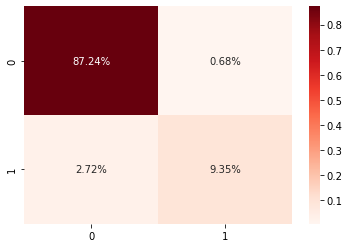

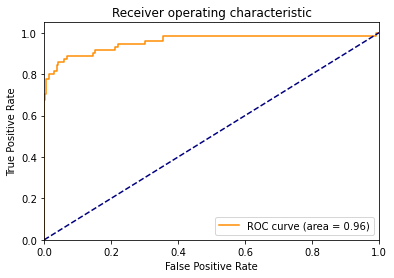

In [57]:
#метрики двошарової нейронної мережі
print('Тренувальні дані:')
metrics(X_train_dataset, y_train_dataset, best_nclf)
print('-----------------------------------------------')
print('Тестові дані:')
metrics(X_test_dataset, y_test_dataset, best_nclf)
conf_matrix(X_test_dataset, y_test_dataset, best_nclf)
roc_cur(X_test_dataset, y_test_dataset, best_nclf)

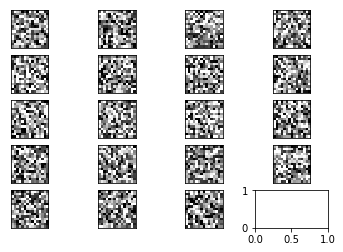

In [58]:
#її зображення
fig, axes = plt.subplots(5, 4)
vmin, vmax = best_nclf.coefs_[0].min(), best_nclf.coefs_[0].max()
for coef, ax in zip(best_nclf.coefs_[0], axes.ravel()):
    ax.matshow(coef.reshape(15, 15), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


Бачимо, що ми змогли подолати перенавчання, проте метрики на тестовому наборі даних у нас погіршились метрики. Перевіримо, як буде працювати нейронна мережа при іншому розбитті

In [59]:
X_train_dataset02, X_test_dataset02, y_train_dataset02, y_test_dataset02 = train_test_split(X_dataset,
                                                                                            y_dataset,
                                                                                            test_size = 0.2,
                                                                                            random_state = 3,
                                                                                            stratify = y_dataset)

In [60]:
mlp_cl_3.fit(X_train_dataset02, y_train_dataset02)
best_nclf.fit(X_train_dataset02, y_train_dataset02)

MLPClassifier(batch_size=14, early_stopping=True, hidden_layer_sizes=(225, 225),
              max_iter=5, n_iter_no_change=1, random_state=42, warm_start=True)

In [61]:
metrics(X_train_dataset02, y_train_dataset02, mlp_cl_3)
print('--------------------------------------------------')
metrics(X_train_dataset02, y_train_dataset02, best_nclf)

precision_score :  1.0
recall_score    :  0.9942196531791907
f1_score        :  0.9971014492753623
--------------------------------------------------
precision_score :  0.9194630872483222
recall_score    :  0.791907514450867
f1_score        :  0.8509316770186335


In [62]:
metrics(X_test_dataset02, y_test_dataset02, mlp_cl_3)
print('--------------------------------------------------')
metrics(X_test_dataset02, y_test_dataset02, best_nclf)

precision_score :  0.8636363636363636
recall_score    :  0.8837209302325582
f1_score        :  0.8735632183908046
--------------------------------------------------
precision_score :  0.9459459459459459
recall_score    :  0.813953488372093
f1_score        :  0.875


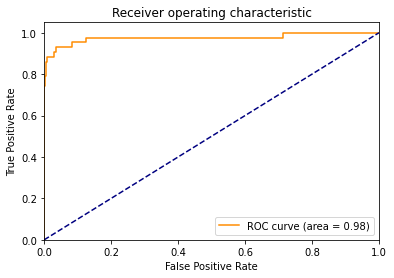

In [63]:
roc_cur(X_test_dataset02, y_test_dataset02, mlp_cl_3)

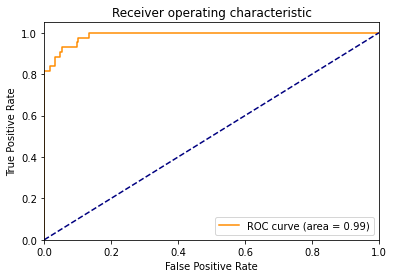

In [64]:
roc_cur(X_test_dataset02, y_test_dataset02, best_nclf)

Бачимо, що "найкраща" модель дає кращу метрику presicion, завдяки чому має кращі f1_score та roc_score, проте гірший recall, звідки маємо такий висновок: модель best_nclf краще використовувати, коли ми хочемо отримати тільки значення, які скоріш за все належать саме такому типу, а модель mlp_cl_3 - коли хочемо отримати найбільше потрібних значень типу

### 2 датасет

In [65]:
X_array = np.random.randn(300, 2)
y_array = np.logical_xor(X_array[:, 0] > 0 , X_array[:, 1] > 0)

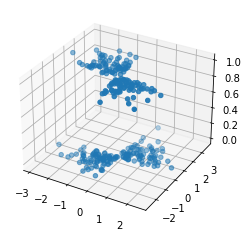

In [66]:
#графічне зображення X та y у просторі
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_array[:, 0], X_array[:, 1], y_array)
plt.show()

In [67]:
#нормалізація масиву
X_array = sc.fit_transform(X_array)

In [68]:
#розбиття на тестовий та тренувальний набори
X_train_arr, X_test_arr, y_train_arr, y_test_arr = train_test_split(X_array,
                                                                    y_array,
                                                                    test_size = 0.2,
                                                                    random_state = 42,
                                                                    stratify = y_array)

In [69]:
#побудова одношарової нейронної мережі
mlp_cl_arr = MLPClassifier(hidden_layer_sizes = (), random_state=42)
mlp_cl_arr.fit(X_train_arr, y_train_arr)

MLPClassifier(hidden_layer_sizes=(), random_state=42)

In [70]:
print('Тренувальні дані:')
metrics(X_train_arr, y_train_arr, mlp_cl_arr)
print('-------------------------------------------')
print('Тестові дані:')
metrics(X_test_arr, y_test_arr, mlp_cl_arr)

Тренувальні дані:
precision_score :  0.4370860927152318
recall_score    :  0.584070796460177
f1_score        :  0.5
-------------------------------------------
Тестові дані:
precision_score :  0.375
recall_score    :  0.42857142857142855
f1_score        :  0.39999999999999997


Бачимо, що одношарової нейронної мережі недостатньо

In [71]:
#побудова двошарової нейронної мережі

mlp_cl_arr2 = MLPClassifier(hidden_layer_sizes = (100), random_state=42)
mlp_cl_arr2.fit(X_train_arr, y_train_arr)

MLPClassifier(hidden_layer_sizes=100, random_state=42)

Тренувальні дані:
precision_score :  1.0
recall_score    :  0.9734513274336283
f1_score        :  0.9865470852017937
-------------------------------------------
Тестові дані:
precision_score :  0.9629629629629629
recall_score    :  0.9285714285714286
f1_score        :  0.9454545454545454


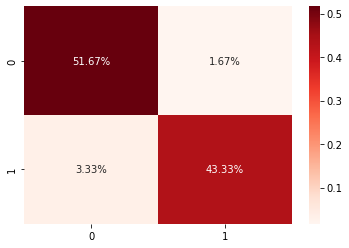

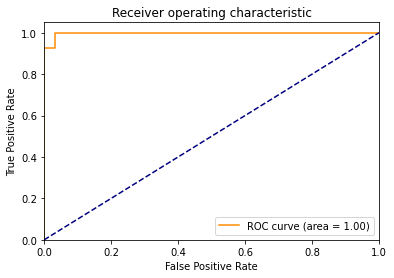

In [72]:
print('Тренувальні дані:')
metrics(X_train_arr, y_train_arr, mlp_cl_arr2)
print('-------------------------------------------')
print('Тестові дані:')
metrics(X_test_arr, y_test_arr, mlp_cl_arr2)
conf_matrix(X_test_arr, y_test_arr, mlp_cl_arr2)
roc_cur(X_test_arr, y_test_arr, mlp_cl_arr2)

Бачимо, що двошарової нейронної мережі буде достатньо

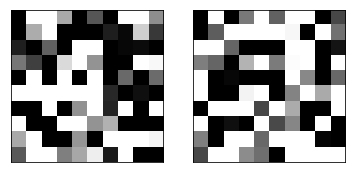

In [73]:
#"візуалізація" нейронної мережі

fig, axes = plt.subplots(1, 2)
vmin, vmax = mlp_cl_arr2.coefs_[0].min(), mlp_cl_arr2.coefs_[0].max()
for coef, ax in zip(mlp_cl_arr2.coefs_[0], axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Спробуємо знайти кращу модель за допомогою решітчатого пошуку

In [74]:
parameters = {
    'hidden_layer_sizes' : range(60, 101, 10),
    'batch_size'         : range(1, 11),
}

In [75]:
best_nclf_arr = MLPClassifier(random_state = 42, early_stopping = True, warm_start=True, max_iter=3, n_iter_no_change=2)
best_nclf_arr = GridSearchCV(best_nclf_arr, parameters, scoring='f1', cv=5)

In [76]:
best_nclf_arr.fit(X_train_arr, y_train_arr)

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=3,
                                     n_iter_no_change=2, random_state=42,
                                     warm_start=True),
             param_grid={'batch_size': range(1, 11),
                         'hidden_layer_sizes': range(60, 101, 10)},
             scoring='f1')

In [77]:
#найкращі параметри
best_nclf_arr.best_params_

{'batch_size': 1, 'hidden_layer_sizes': 60}

In [78]:
best_nclf_arr = best_nclf_arr.best_estimator_

Тренувальні дані:
precision_score :  0.9724770642201835
recall_score    :  0.9380530973451328
f1_score        :  0.954954954954955
-------------------------------------------
Тестові дані:
precision_score :  1.0
recall_score    :  0.9285714285714286
f1_score        :  0.962962962962963


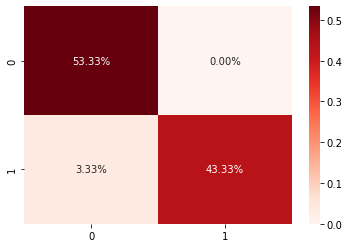

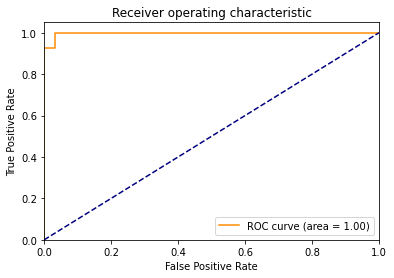

In [79]:
print('Тренувальні дані:')
metrics(X_train_arr, y_train_arr, best_nclf_arr)
print('-------------------------------------------')
print('Тестові дані:')
metrics(X_test_arr, y_test_arr, best_nclf_arr)
conf_matrix(X_test_arr, y_test_arr, best_nclf_arr)
roc_cur(X_test_arr, y_test_arr, best_nclf_arr)

Бачимо, що ми змогли як уникнути перенавчання, так і покращити метрики моделі

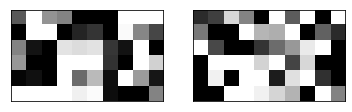

In [81]:
#"візуалізація" цієї моделі

fig, axes = plt.subplots(1, 2)
vmin, vmax = best_nclf_arr.coefs_[0].min(), best_nclf_arr.coefs_[0].max()
for coef, ax in zip(best_nclf_arr.coefs_[0], axes.ravel()):
    ax.matshow(coef.reshape(6, 10), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [82]:
#функція для побудови границь рішень

def plot_decision_boundary(pred_func, X, y):
#встановісо максимальне та мінімальне значення
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
#генерація сітки тоок з відстанню h між ними
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#прогнозуємо значення для всіх точок
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
#малюємо границі ріщень
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

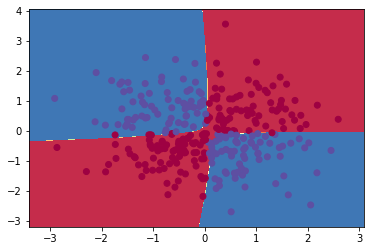

In [83]:
#границі рішень
plot_decision_boundary(lambda x: best_nclf_arr.predict(x), X_array, y_array)

## Висновки

    У ході виконання лабораторної роботи №3 було проведено класифікацію за допомогою sklearn.neural_network.MLPClassifier, а також оцінено якість отриманих нейронних мереж. Для першого датасету була обрана трьошарова нейронна мережа, для другого - двошарова. В іншому алгоритм виконання роботи над датасетами не відрізнявся: було проведено нормалізацію вхідних даних, їх візуалізацію, датасети були розбиті на тестовий та тренувальний набори, було побудовано декілька моделей, серед яких за допомогою решітчатого пошуку підібрали найкращу та оцінили її параметри.
    Загалом, вбудовані в sklearn нейронні мережі показали себе краще, аніж дерева рішень у минуій лабораторній роботі, проте для "ускладнення" моделі, на мою думку, краще б підійшов умовний Random Forest